# Analisi simulazione passo gara
## (Per la sessione di FP2 non ci sono state simulazioni in grado di fare confronti effettivi)

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting

ff1.Cache.enable_cache('2023Australia')
race = ff1.get_session(2023, 'Australia', 'FP2')
race_laps = race.load_laps(with_telemetry=True)
race.load()


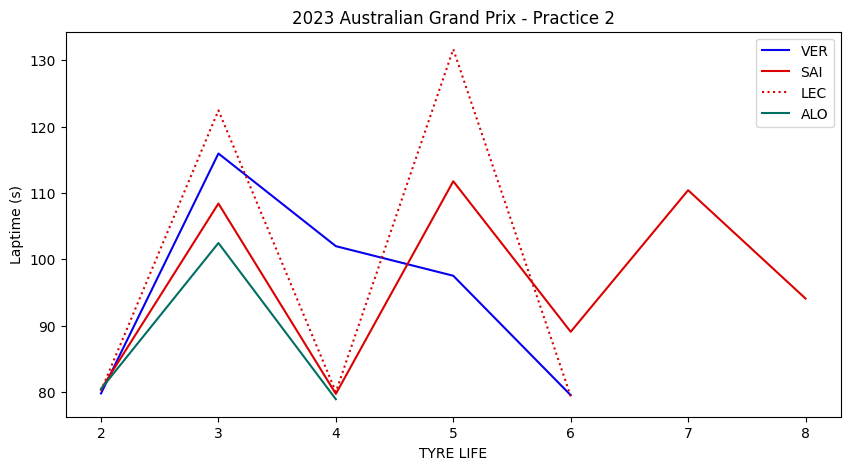

In [40]:
stint = 1
compound="MEDIUM"

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull())]

race_laps = race_laps.loc[((race_laps['Driver'] == "VER") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True)) | 
                          ((race_laps['Driver'] == "SAI") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "ALO") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "PER") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "LEC") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "HAM") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "RUS") & (race_laps['Compound'] == compound) & (race_laps['IsAccurate']==True)) ] 

drivers_to_visualize = pd.unique(race_laps.Driver)

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 5]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()
# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    driver_laps = race_laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team', 'TyreLife']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['TyreLife']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=driver_laps['LapTimeSeconds']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle)
    
    # Append labels
    ax.set(ylabel = 'Laptime (s)')
    ax.set(xlabel = 'TYRE LIFE')
    
    # Set title
    ax.set_title(f"{race.event.year} {race.event.EventName} - {race.name}")

    # Generate legend
    ax.legend()
    visualized_teams.append(team)  